# Marketing Campaigns Project

## Problem Statement

Marketing mix is a widely utilized concept in the execution of marketing strategies. It encompasses various facets within a comprehensive marketing plan, with a central focus on the four Ps of marketing: **Product**, **Price**, **Place**, and **Promotion**. This project focuses on leveraging data science techniques to understand customer acquisition factors and evaluate the effectiveness of marketing campaigns.


## **Phase 1: Data Import and Exploration**
### **Step 1: Import Libraries and Load Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./datasets/marketing_data.csv')

# Display first few rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### **Step 2: Initial Data Exploration**
- Check for missing values and data types.
- Analyze key variables like `Income` and `Dt_Customer`.

In [4]:
# Check for missing values
print(data.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64


In [6]:
# Data types and summary statistics
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [9]:
print(data.describe())

                 ID   Year_Birth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000

**Observations**:
- Missing values are present in the `Income` column.
- Some categorical variables (e.g., `Education`, `Marital_Status`) may need cleaning.
---

## **Phase 2: Data Cleaning**

### **Step 3: Handle Missing Values**
- Impute missing `Income` values based on `Education` and `Marital_Status`.

In [10]:
# Clean Income column (remove "$" and ",")
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)

KeyError: 'Income'

In [12]:
# get the columns names
print(data.columns)

# Column Income is named wrongly ' Income ', so we need to remove the spaces
data = data.rename(columns={' Income ':'Income'})
print(data.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')
Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='objec

In [13]:
# Now we can clean the Income column
data['Income'] = data['Income'].str.replace('$', '').str.replace(',', '').astype(float)
data['Income'].head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [14]:
data.Dt_Customer

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [ ]:
# Convert Dt_Customer to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]

In [17]:
print(data['Dt_Customer'].head())

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]


In [19]:
# Check for the values in the Marital_Status column
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [20]:
# Clean Marital_Status column (e.g., remove invalid entries like "YOLO")
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Absurd'], data['Marital_Status'].mode()[0])

In [22]:
print(data['Marital_Status'].value_counts())

Marital_Status
Married     868
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Name: count, dtype: int64


In [21]:
# Display the cleaned data
print(data.head())
print(data.info())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2014-06-16        0       189  ...                  6                  1   
1  2014-06-15        0       464  ...                  7                  5   
2  2014-05-13        0       134  ...                  5                  2   
3  2014-05-11        0        10  ...                  2                  7   
4  2014-04-08        0         6  ...                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  Accep

**Observations:**

- `Dt_Customer` is now in the correct datetime format.
- Missing values in `Income` have been imputed using the mean for each education category.
- Cleaned 'Marital_Status' column by replacing 'YOLO' and 'Absurd' with most frequent value.
---

## **Phase 3: Feature Engineering**

### **Step 4: Create New Features**

- Derive new variables:
    - **Total Children**: Sum of `Kidhome` and `Teenhome`.
    - **Age**: Derived from `Year_Birth`.
    - **Total Spending**: Sum of spending across all product categories.
    - **Total Purchases**: Sum of purchases across channels.
    - **Customer_For**: Calculate how long the customer has been with the company

In [25]:
# Feature ingeneering
# Create a new column 'Total_Children' by adding 'Kidhome' and 'Teenhome'
data['Total_Children'] = data['Kidhome'] + data['Teenhome']

print(data['Total_Children'].head())

0    0
1    0
2    1
3    2
4    1
Name: Total_Children, dtype: int64


In [26]:
# Create age column by subtracting 'Year_Birth' from current year
import datetime as dt
print(dt.datetime.now().year)
data['Age'] = dt.datetime.now().year - data['Year_Birth']

# Print paralelly the two columns
print(data[['Age', 'Year_Birth']].head())

2025
   Age  Year_Birth
0   55        1970
1   64        1961
2   67        1958
3   58        1967
4   36        1989


In [27]:
# Create 'Total Spending' column by adding 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
data['Total_Spending'] = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

print(data['Total_Spending'].head())

0    1190
1     577
2     251
3      11
4      91
Name: Total_Spending, dtype: int64


In [28]:
# Create 'Total_Purchase' column by adding 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
data['Total_Purchases'] = data[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

print(data['Total_Purchases'].head())

0    14
1    17
2    10
3     3
4     6
Name: Total_Purchases, dtype: int64


In [29]:
# Create 'Customer_For' column by subtracting 'Dt_Customer' from current date
data['Customer_For'] = (dt.datetime.now() - data['Dt_Customer']).dt.days

print(data['Customer_For'].head())

0    3932
1    3933
2    3966
3    3968
4    4001
Name: Customer_For, dtype: int64


In [30]:
print(data.head())

      ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp1  AcceptedCmp2  Response  \
0  2014-06-16        0       189  ...             0             0         1   
1  2014-06-15        0       464  ...             0             1         1   
2  2014-05-13        0       134  ...             0             0         0   
3  2014-05-11        0        10  ...             0             0         0   
4  2014-04-08        0         6  ...             0             0         1   

   Complain  Country  Total_Children  Age  Total_S

**Observations:**

- New features have been created, providing additional dimensions for analysis.
---

## **Phase 4: Exploratory Data Analysis**

### **Step 5: Visualizations**

#### Income Distribution

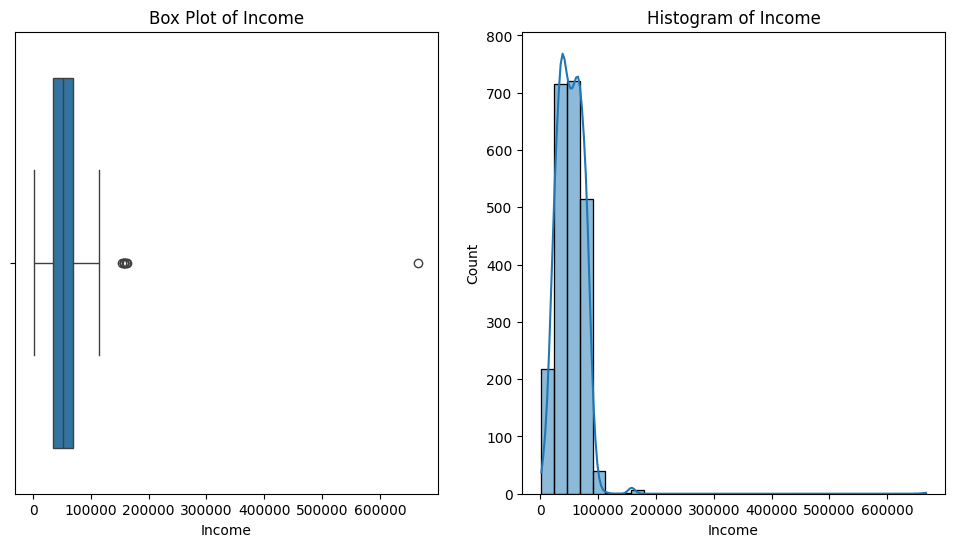

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='Income')
plt.title('Box Plot of Income')

plt.subplot(1,2,2)
sns.histplot(data=data['Income'], kde=True, bins=30)
plt.title('Histogram of Income')
plt.show()

#### Total Spending Distribution

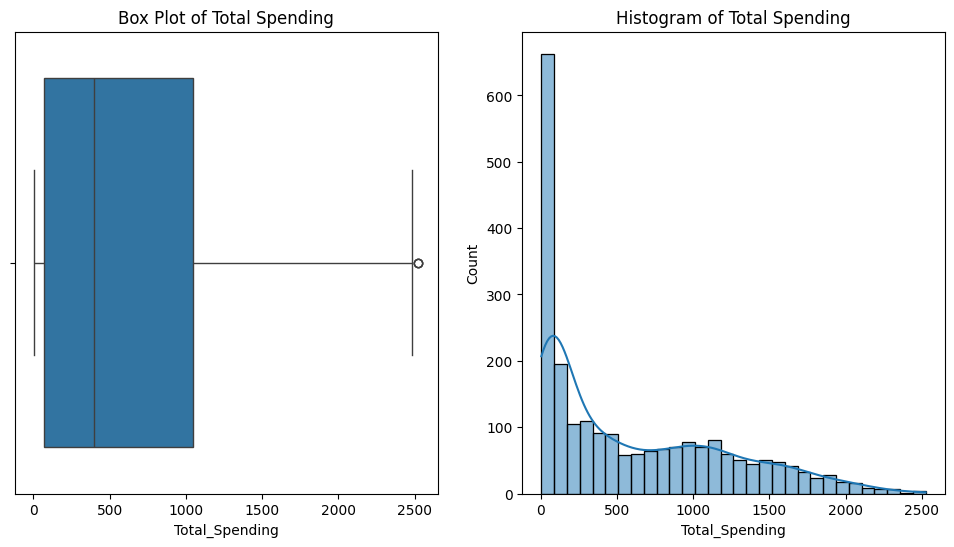

In [33]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=data, x='Total_Spending')
plt.title('Box Plot of Total Spending')

plt.subplot(1,2,2)
sns.histplot(data=data['Total_Spending'], kde=True, bins=30)
plt.title('Histogram of Total Spending')
plt.show()

#### Age Distribution

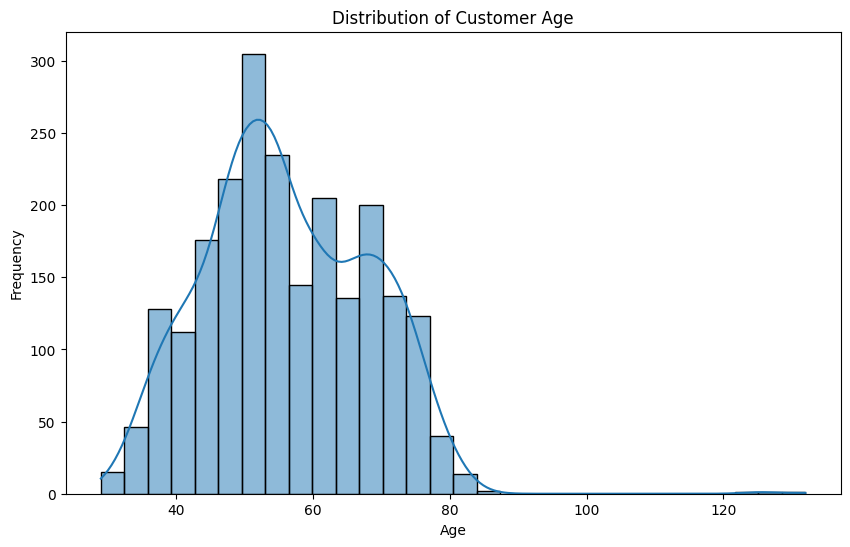

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Treat outliers in Income (capping at 95th percentile)
income_threshold = data['Income'].quantile(0.95)
data['Income'] = data['Income'].clip(upper=income_threshold)

# Treat outliers in Total_Spending (capping at 95th percentile)
spending_threshold = data['Total_Spending'].quantile(0.95)
data['Total_Spending'] = data['Total_Spending'].clip(upper=spending_threshold)


**Observations**:

- Positive skewness is observed in Income and Total Spending distributions, with outliers.
- Most of the customers are between 30 and 60 years old, which is consistent with previous observations.
- Outliers were capped at the 95th percentile for robust analysis.
---